<a href="https://colab.research.google.com/github/byronkamal/data_science/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster

![titanic](https://miro.medium.com/max/2496/1*ONRawnQ6ZUF15TaIIMw7AQ.jpeg)

-----------

**Checklist**
1. Definição do Problema
2. Obtenção dos Dados
3. Exploração dos Dados
4. Preparação dos Dados
5. Construção do Modelo e Avaliação
6. Salvando modelo para deploy

## 1. Definição do problema

O desafio do Titanic é uma das competições mais famosas de Machine Learning. A popularidade desta competição fez com que ela fosse considerada como sendo um "Hello, World!" para o universo de Data Science (Ciência de Dados).
O Titanic era navio mais moderno do mundo para a época. Apesar da tecnologia disponível, após colidir com um iceberg em 15 de abril de 1912, seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.

> **O principal objetivo desse desafio é utilizar os dados disponíveis para medir a chance de sobrevivência dos passageiros do Titanic.**

## 2. Obtenção dos dados
[Os dados são disponilizados pelo Kaggle](https://www.kaggle.com/c/titanic/data) foram divididos em 2 grupos: 
- <p align='justify'>Dados de treinamento <i>(train.csv)</i>: essa dados servem para construir o modelo de machine learning. Nesse dataset há features sobre os passageiros e é informado se ele sobreviveu ou não.</p>
- Dados de teste <i>(test.csv)</i>: nesse dataset há dados que não foram "vistos" pelo modelo de machine learning e é em cima deles que a predição é feita avaliação do modelo. Aqui **não** é informado se o passageiro sobreviveu ou não.

<p align='justify'>Para facilitar, os dados já estão disponíveis nessa mesma pasta do notebook.</p>

In [60]:
# importar os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos no notebook
# %matplotlib inline

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# importação dos arquivos para o modelo
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/titanic/data/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/titanic/data/test.csv')


# verificando as dimensões do DataFrame
print("Variáveis(colunas):\t{}\nEntradas(linhas):\t{}".format(train.shape[1], train.shape[0]))

Variáveis(colunas):	12
Entradas(linhas):	891


## 3. Exploração dos Dados

<p align='justify'> A Exploração dos dados é uma parte importante dentro de Data Science pois aqui é realizada a análise das variáveis. Realizaremos a seguir alguns procedimentos como definir a váriavel alvo (target), dicionário de dados, visualização e correlação entre os dados. Esses procedimentos ajudam na análise dos dados. 
</p>

<p align='justify'> 
Como estamos trabalhando com Aprendizado Supervisionado, é necessário que exista uma váriavel alv, que no nosso caso é <i>Survived</i>. 
</p>

<br/>

**Vamos primeiramente identificar qual é o tipo de cada variável para depois montarmos nosso Dicionário de Dados**


In [63]:
# identificar o tipo de dados cada variável 
display(train.dtypes)

# ver os primeiros registros dataset de treino
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dicionário de Dados
| Variável | Descrição | Key | Tipo de Dado |Tipo de variável|
|--|--|--|--|--|
|PassengerId|Número de indetificação de cada passageiro|-|int|Númérica Discreta - **Chave Primária**|
|Survived|informa se o passageiro sobreviveu ou não ao desastre|0 = Não, 1 = Sim|int|Númerica Discreta - **Alvo**|
|Pclass|Classe do bilhete|1 = 1ª classe, 2 = 2ª classe, 3 = 3º classe|int|Númerica Discreta|
|SibSp|(siblings / spouses) Número de irmãos/côjuges abordo no Titanic|-|int|Númerica Discreta|
|Parch|(parents / children) Número de pais/crianças abordos no Titanic|-|int|Númerica Discreta|
|Age|Idade do passageiro|-|float|Númerica Contínua|
|Fare|Preço da passagem|-|float|Númerica Contínua|
|Name|Nome do passageiro|-|object|Categórica|
|Sex|Sexo do passageiro|-|object|Categórica|
|Ticket|Número da passagem|-|object|Categórica|
|Cabin|Número da cabine do passageiro|C = Cherbourg(França), Q = Queenstown(Irlanda), S = Southampton(Reino Unido)|object|Categórica|
|Embarked|Porto de embarque do passageiro|-|object|Categórica|

### Valores faltantes

<p align='justify'> É necessário sabermos quais são os valores faltantes em nosso dataset e, a seguir, é possível ver a quantidade em números e a porcetagem desses valores: </p>

In [64]:
# quantidade de informações faltantes
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [65]:
# porcentagem das informações faltantes
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

Temos ao total **891 entradas** e é possível constatar que **Cabin** é a que possui a maior quantidade de dados faltantes, com 687 valores ausentes ou, em porcentagem, mais de 77%. Temos em seguida as colunas **Age** que possui 177 valores ausentes, quase 20%, e **Embarked** com 2 também ausentes representando pouco mais de 2%.

### Análise estatística dos dados

In [66]:
# ver distribuição estatística
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f372f957780>,
      dtype=object)

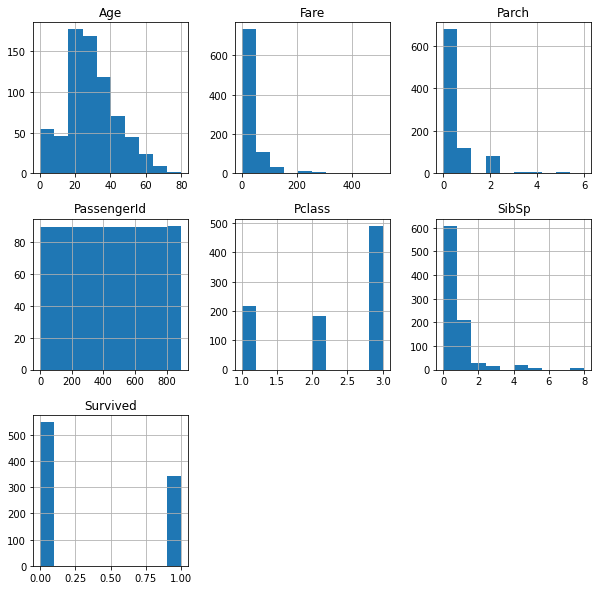

In [67]:
# histograma das variáveis númericas
train.hist(figsize=(10,10))

<br/>

**Já que nosso objetivo é construir um modelo para medir a chance de sobrevivência dos passageiros do Tianic, então é importante termos algumas análises dos dados relacionados à coluna Survived**

In [68]:
# probabilidade de sobrevivência pelo Sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


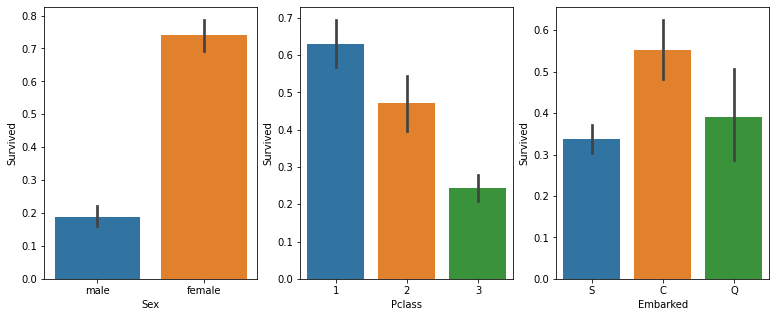

In [69]:
# Gráficos para Survived vs Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(13,5))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

Então podemos visualizar que:
- Mulheres(75%) tiveram mais chances de sobrevivrem do que homens(18%)
- Passageiros da 3ª classe tiveram menos chance de sobrevivência do que os passegeiros de 1ª ou 2ª classe.

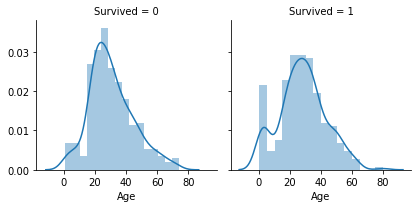

In [70]:
# influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

Comparando os gráficos acima, podemos observar que houve um pico de crianças pqeuenas no lado dos sobreviventes, o que nos leva a confirmar o famoso lema "Crianças e mulheres primeiro".

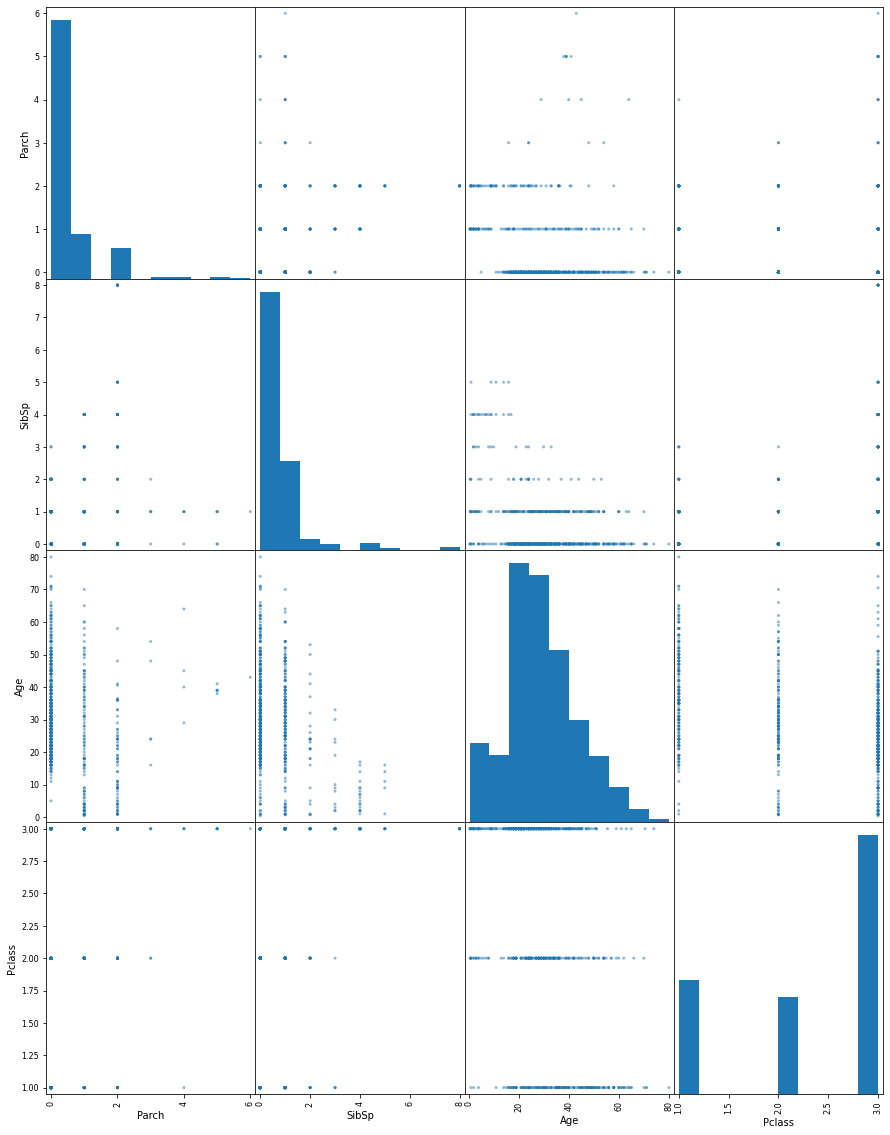

In [71]:
# plotar uma scatter matrix (matriz de dispersão)
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 20));

A gente consegue obeservar no gráfico acima coisas como, por exemplo, o fato de que pessoas mais velhas estão mais concentradas na 1ª Classe e pessoas mais jovens na 3ª classe.

In [72]:
# ver correlações entre as variavéis numéricas com pandas
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


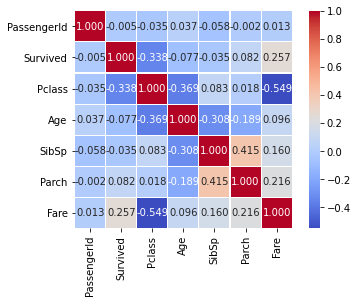

In [73]:
# ver correlações entre as variavéis numéricas com seaborn
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.3f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

## 4. Preparação dos dados

**A seguir vamos concatenar os datasets de treino e teste**

A concatenação dos datasets ficilita a etapa de preparação dos dados, pois é mais fácil fazer todas as etapas em somente um DataFrame do que em dois. No final do processo, esse único conjunto de dados pode ser separada novemente entre treino e teste.

In [74]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
y_train = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


**Seleção de features**

Após a exploração e análise dos dados algumas variáveis podem não servir para nada ou não terem significância para o modelo de Machine Learning.

No nosso dataset, iremos retirar as variáveis <i>['PassangerId', 'Name','Ticket', 'Cabin'],</i> pois **aparentemente** elas não irão ter tanto peso no nosso modelo.
Assim, ficamos com as variáveis <i>['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'].</i>

In [75]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


<br />

**Tratamentos dos dados faltantes**

A seguir vamos analisar como faremos o tratamentos dos dados faltantes (<i>missing values</i>). Temos duas abordagens mais comuns:
- Preencher esses valores arbitrariamente (média, mediana, valor mais frequente);
- Excluir a linha inteira.

In [76]:
# ver quantidade de valores faltantes
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Para idade e tarifa vamos subtituir com a mediana e para porto de embarque vamos colocar o valor com maior frequência.

In [77]:
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

<br />

**Preparação das Variáveis Categóricas**

No nosso dataset ainda existem variáveis que são do tipo categórica, porém nosso modelo só trabalha com variáveis do tipo numérica. Então, será aplicado a conversão de 'Sex' para {'male': 0, 'female': '} e para 'Embarked' será aplicado o conceito de variáveis dummies (assumem apenas valores 0 e 1, criando uma nova coluna para cada valor possível da variável categórica).

In [78]:
# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

df_merged

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,28.0,0,0,8.0500,0,0,0,1
1305,1,1,39.0,0,0,108.9000,0,1,0,0
1306,3,0,38.5,0,0,7.2500,0,0,0,1
1307,3,0,28.0,0,0,8.0500,0,0,0,1


<br />

**Recuperando os dasets de treino e teste**

Após a preparação do dataset para o modelo, vamos divir o <i>df_merged</i> em <i>train</i> e <i>test</i> novamente.

In [79]:
# dividir datasets de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

print('shape train:' + str(train.shape) + '\nshape teste:' + str(test.shape))

shape train:(891, 10)
shape teste:(418, 10)


## 5. Construção do Modelo e Avaliação

Com nossos datasets tratados, agora podemos partir para a construção e avaliação do modelo. Existem vários tipos de algoritmos para modelagem preditiva, mas como estamos trabalhando com um problema que envolve classificação e regressão, vamos restringir nossas escolhas aos seguintes modelos:
- Regressão Logística 
- Decision Tree


In [80]:
# importar bibliotecas dos modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [81]:
# Regressão Logística
logreg_model = LogisticRegression(solver='liblinear')
logreg_model.fit(train, y_train)

# verificar a acurácia do modelo
acc_logReg = round(logreg_model.score(train, y_train) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13


In [82]:
# Árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, y_train)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(train, y_train) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))


Acurácia do modelo de Árvore de Decisão: 82.72


Como foi possível ver visualizar, o **modelo Árvore de Decisão** aplicado foi o que obeteve **maior acurácia** entre os modelos testados. Então, iremos realizar a predição em cima dele para submissão ao Kaggle.

In [83]:
y_pred = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred
})

# gerar arquivo csv
submission.to_csv('./submission.csv', index=False)

# ver arquivo de submissão no Kaggle
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# 6. Salvando modelo para deploy

Após a escolha e treinamento do modelo, temos que salvá-lo para que possamos realizar o deploy e para isso vamos utilizar um biblioteca chamada *joblib*.

In [84]:
# Salvando modelo
from joblib import dump, load

dump(tree_model, 'model.joblib')

['model.joblib']

In [85]:
# Salvando os nomes da colunas
features = train.columns.values

dump(features, 'features.names')

['features.names']

Após salvarmos o modelo, ele servirá para deploy e utilização atráves de um API feita em Flask. 
O deploy foi realizado na plataforma [Heroku](https://heroku.com) e seu código fonte está disponível
[aqui](https://github.com/byronkamal/titanic-survival-predict).